In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('/Users/phu/Documents/K_31/EDA_K31/data/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
male_df = df[df['Sex'] == 'male'].reset_index()
male_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
2,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
3,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
573,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
574,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
575,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
female_df = df[df['Sex'] == 'female'].reset_index()
female_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
310,882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
311,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
312,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [5]:
# building the model and fitting the data
log_reg = smf.logit("Survived ~ Age + Fare", data=male_df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.484578
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  453
Model:                          Logit   Df Residuals:                      450
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                 0.04547
Time:                        16:34:19   Log-Likelihood:                -219.51
converged:                       True   LL-Null:                       -229.97
Covariance Type:            nonrobust   LLR p-value:                 2.878e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9283      0.273     -3.395      0.001      -1.464      -0.392
Age           -0.0240      0.

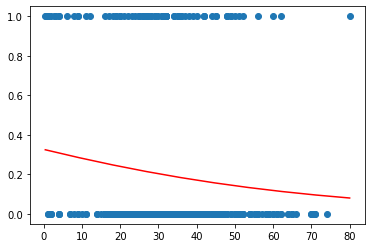

In [7]:
pred_input = np.linspace(male_df['Age'].min(),male_df['Age'].max(),10)
predictions = 1 / (1 + np.exp(0. + 0.0214*pred_input))
plt.scatter(male_df['Age'],male_df['Survived'])
plt.plot(pred_input,predictions,c='red')
plt.show()

In [6]:
# building the model and fitting the data
log_reg = smf.logit("Survived ~ Age + Fare", data=female_df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.508920
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  261
Model:                          Logit   Df Residuals:                      258
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                 0.08634
Time:                        16:35:01   Log-Likelihood:                -132.83
converged:                       True   LL-Null:                       -145.38
Covariance Type:            nonrobust   LLR p-value:                 3.537e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1421      0.340      0.418      0.676      -0.525       0.809
Age            0.0093      0.

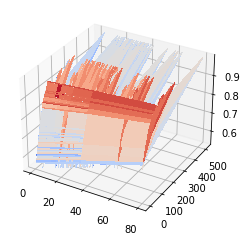

In [11]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.array(df['Age'])
Y = np.array(df['Fare'])
X, Y = np.meshgrid(X, Y)
Z = 1 / (1 + np.exp(-0.1421 - 0.0093*X - 0.0222 * Y))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)